In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
raw_df=pd.read_csv('weatherAUS.csv')
raw_df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [14]:
raw_df.dropna(subset=['RainToday','RainTomorrow'],inplace=True)

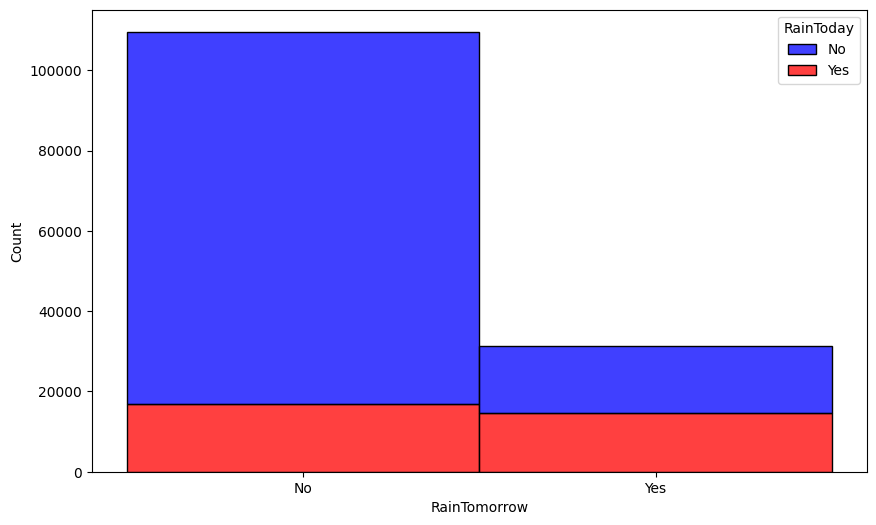

In [16]:
fig,ax=plt.subplots(figsize=(10,6))
sns.histplot(
    raw_df,
    x='RainTomorrow',
    hue='RainToday',
    palette=['blue','red'],
    multiple='stack'
)
plt.show()

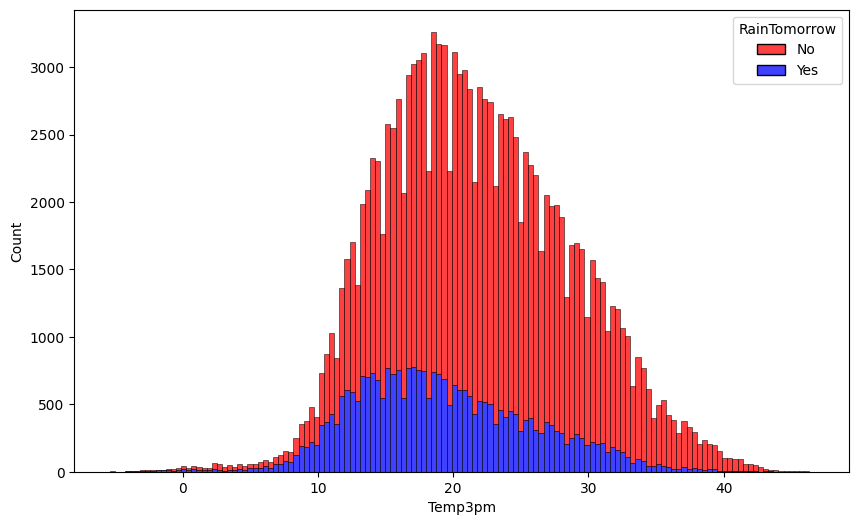

In [10]:
fig,ax=plt.subplots(figsize=(10,6))
sns.histplot(
    raw_df,
    x='Temp3pm',
    hue='RainTomorrow',
    palette=['red','blue'],
    multiple='stack'
)
plt.show()



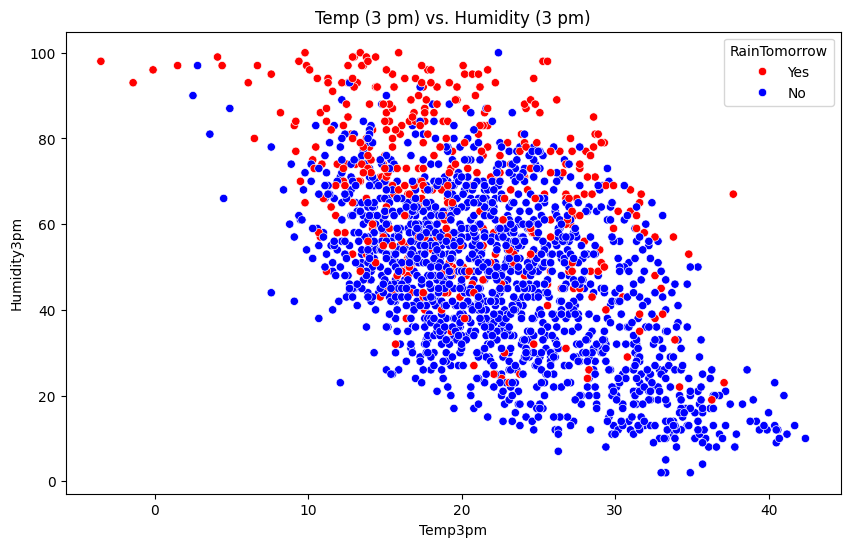

In [24]:
fig, ax = plt.subplots(figsize=(10, 6))

# Create the scatter plot using Seaborn
sns.scatterplot(data=raw_df.sample(2000), 
                x='Temp3pm', 
                y='Humidity3pm', 
                hue='RainTomorrow', 
                palette=['red', 'blue'], 
                ax=ax)

# Set the title using Matplotlib
ax.set_title('Temp (3 pm) vs. Humidity (3 pm)')

plt.show()

In [25]:
from sklearn.model_selection import train_test_split
train_val_df, test_df = train_test_split(raw_df, test_size=0.2, random_state=42)
train_df, val_df = train_test_split(train_val_df, test_size=0.25, random_state=42)

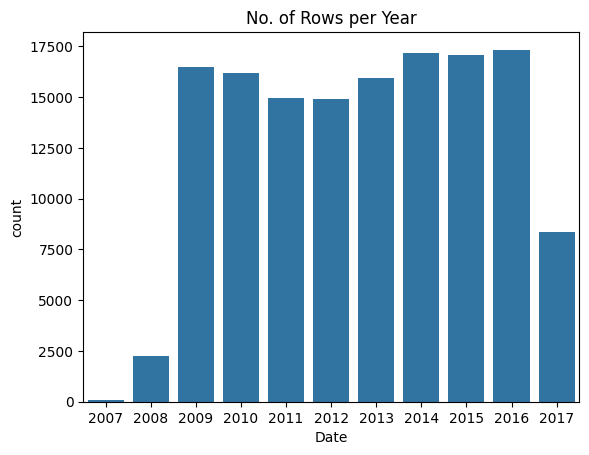

In [26]:
plt.title('No. of Rows per Year')
sns.countplot(x=pd.to_datetime(raw_df.Date).dt.year);

In [27]:
input_cols = list(train_df.columns)[1:-1]
target_col = 'RainTomorrow'

In [28]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()

In [29]:
val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()

In [30]:
test_inputs = test_df[input_cols].copy()
test_targets = test_df[target_col].copy()

In [32]:
import numpy as np
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()

In [33]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'mean')
raw_df[numeric_cols].isna().sum()
train_inputs[numeric_cols].isna().sum()
imputer.fit(raw_df[numeric_cols])

SimpleImputer()

In [34]:
train_inputs[numeric_cols] = imputer.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = imputer.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = imputer.transform(test_inputs[numeric_cols])

In [35]:
train_inputs[numeric_cols].isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

In [37]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(raw_df[numeric_cols])

MinMaxScaler()

In [38]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [39]:
train_inputs[numeric_cols].describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,84471.000000,84471.000000,84471.000000,84471.000000,84471.000000,84471.000000,84471.000000,84471.000000,84471.000000,84471.000000,84471.000000,84471.000000,84471.000000,84471.000000,84471.000000,84471.000000
mean,0.487426,0.529725,0.006326,0.037724,0.526367,0.263371,0.107630,0.214346,0.688250,0.514403,0.614184,0.610632,0.492427,0.499593,0.509908,0.519785
std,0.150961,0.134534,0.022926,0.021832,0.189030,0.101541,0.067851,0.099784,0.189571,0.205645,0.111595,0.106995,0.253618,0.234274,0.136939,0.132092
min,0.000000,0.018904,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000,0.000000,0.024793,0.000000,0.000000,0.000000,0.004219,0.005758
25%,0.379717,0.429112,0.000000,0.027586,0.526244,0.193798,0.053846,0.149425,0.570000,0.370000,0.545455,0.542400,0.333333,0.444444,0.411392,0.424184
50%,0.483491,0.519849,0.000000,0.037741,0.526244,0.255814,0.100000,0.214151,0.700000,0.514493,0.614125,0.610527,0.492351,0.499917,0.504219,0.512476
75%,0.596698,0.623819,0.002156,0.037741,0.606897,0.310078,0.146154,0.275862,0.830000,0.650000,0.682645,0.676800,0.666667,0.666667,0.605485,0.608445
max,1.000000,1.000000,1.000000,1.000000,0.986207,1.000000,0.669231,0.954023,1.000000,1.000000,1.000000,0.980800,1.000000,1.000000,0.983122,1.000000


In [ ]:
scaler.fit(categorical_cols)
scaler.transform()